<h1>Code<h1>

In [1]:
# first we begin with tensorflow (keras)
# the best approach seems to be through examples
# this should serve as a fine introduction
# and we can pick the rest as we go through future parts

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,Activation,Input,Layer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# first lets get the data , we will use MNIST dataset
def get_mnist(limit=None,normalise = False , transform = False, D=300): 
    df = pd.read_csv('datasets/MNIST/train.csv')
    data = df.to_numpy()
    np.random.shuffle(data)
    X = data[:,1:]
    Y = data[:,0]
    # data is too large , so training would take too much time
    # of course to little data is not good and leads to overfitting

    Xtrain = X[:-1000]
    Ytrain = Y[:-1000]
    Xtest  = X[-1000:]
    Ytest  = Y[-1000:]
    
    
    if transform:
        # center X
        mu = Xtrain.mean(axis=0)
        Xtrain = Xtrain-mu
        Xtest = Xtest-mu
        pca = PCA()
        Ztrain = pca.fit_transform(Xtrain)
        Ztest = pca.transform(Xtest)
        # take first 300 cols of Z
        Ztrain = Ztrain[:, :300]
        Ztest = Ztest[:, :300]
        # normalize Z
        mu = Ztrain.mean(axis=0)
        std = Ztrain.std(axis=0)
        np.place(std,std==0,1)
        Ztrain = (Ztrain - mu) / std
        Ztest = (Ztest - mu) / std
        return Ztrain,Ztest,Ytrain,Ytest

    
    if normalise:
        mu = Xtrain.mean(axis=0)
        std = Xtrain.std(axis=0)
        np.place(std,std==0,1)
        Xtrain = (Xtrain-mu)/std
        Xtest = (Xtest-mu)/std
        return Xtrain,Xtest,Ytrain,Ytest
    
    return Xtrain,Xtest,Ytrain,Ytest

In [4]:
Xtrain,Xtest,Ytrain,Ytest = get_mnist(normalise=True)

In [5]:
def one_hot_encode(Y):
    N = len(Y)
    D = Y.max()+1
    encoded = np.zeros((N,D))
    for i in range(N):
        encoded[i,Y[i]] = 1
    return encoded


Ttrain = one_hot_encode(Ytrain)
Ttest = one_hot_encode(Ytest)

_,D = Xtrain.shape
K = len(set(Ytrain).union(set(Ytest)))

In [6]:
# this is our model , a sequence of layers
model = Sequential()
# hidden layer size 500
model.add(Dense(units=500,input_dim = D))
# activation function
model.add(Activation('relu'))
# another hidden layer of size 300
model.add(Dense(units=300))
# again another activation function
model.add(Activation('relu'))
# final dense layer of size K
model.add(Dense(units=K))
model.add(Activation('softmax'))

In [7]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [8]:
r = model.fit(Xtrain,Ttrain,epochs=15,batch_size = 32,validation_data=(Xtest,Ttest))

Epoch 1/15
1282/1282 [==============================] - 4s 3ms/step - loss: 0.2491 - accuracy: 0.9304 - val_loss: 0.1425 - val_accuracy: 0.9500
Epoch 2/15
1282/1282 [==============================] - 4s 3ms/step - loss: 0.1061 - accuracy: 0.9691 - val_loss: 0.1347 - val_accuracy: 0.9580
Epoch 3/15
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0817 - accuracy: 0.9749 - val_loss: 0.1540 - val_accuracy: 0.9570
Epoch 4/15
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0687 - accuracy: 0.9801 - val_loss: 0.1152 - val_accuracy: 0.9630
Epoch 5/15
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0544 - accuracy: 0.9836 - val_loss: 0.1352 - val_accuracy: 0.9660
Epoch 6/15
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.1848 - val_accuracy: 0.9580
Epoch 7/15
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0468 - accuracy: 0.9873 - val_loss: 0.1336 - val_accuracy:

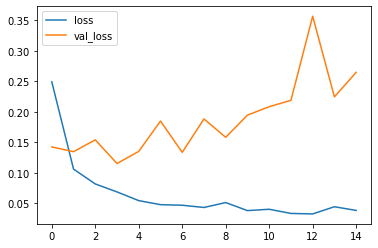

In [9]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

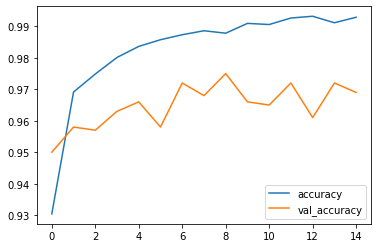

In [10]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [11]:
# lets look at another way to create the model
i = Input(shape=(D,))
x = Dense(500,activation='relu')(i)
x = Dense(300,activation='relu')(x)
x = Dense(K,activation='softmax')(x)
model2 = Model(inputs=i,outputs=x)

In [12]:
# the rest is the same
model2.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [13]:
r = model2.fit(Xtrain,Ttrain,epochs=15,batch_size = 32,validation_data=(Xtest,Ttest))

Epoch 1/15
1282/1282 [==============================] - 4s 3ms/step - loss: 0.2488 - accuracy: 0.9295 - val_loss: 0.1523 - val_accuracy: 0.9540
Epoch 2/15
1282/1282 [==============================] - 4s 3ms/step - loss: 0.1124 - accuracy: 0.9673 - val_loss: 0.1112 - val_accuracy: 0.9640
Epoch 3/15
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0790 - accuracy: 0.9759 - val_loss: 0.1466 - val_accuracy: 0.9580
Epoch 4/15
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0620 - accuracy: 0.9818 - val_loss: 0.1490 - val_accuracy: 0.9570
Epoch 5/15
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0610 - accuracy: 0.9820 - val_loss: 0.1329 - val_accuracy: 0.9600
Epoch 6/15
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0558 - accuracy: 0.9850 - val_loss: 0.1825 - val_accuracy: 0.9660
Epoch 7/15
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0498 - accuracy: 0.9863 - val_loss: 0.1665 - val_accuracy:

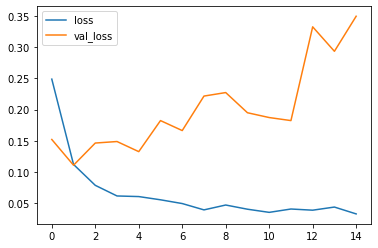

In [14]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

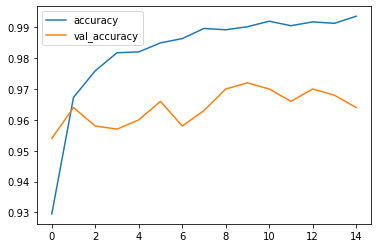

In [15]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [16]:
# the last to introduce are custom layers
# lets try to make a custom batch norm layer

class batch_norm(Layer):
    def __init__(self,decay=0.99,epsilon=1e-8): 
        super(batch_norm, self).__init__()
        self.decay = decay
        self.epsilon = epsilon
    def build(self, input_shape):
        self.gamma = self.add_weight(initializer = 'Ones',shape=input_shape[1:]) 
        self.beta = self.add_weight(initializer = 'Zeros',shape=input_shape[1:])
        self.mu = self.add_weight(initializer = 'Zeros',shape=input_shape[1:],trainable=False)
        self.std = self.add_weight(initializer = 'Zeros',shape=input_shape[1:],trainable=False)
        self.epsilon = tf.constant(self.epsilon) 
        self.decay = tf.constant(self.decay) 
    
        
    def call(self, X,training=None):
        # get mean and standard deviation if batch
        mu_B = tf.math.reduce_mean(X,axis=0)
        std_B = tf.math.reduce_std(X,axis=0)
        # update running mean and standard deviation
        tf.compat.v1.assign(self.mu,self.decay*self.mu + (1-self.decay)*mu_B)
        tf.compat.v1.assign(self.std,self.decay*self.std + (1-self.decay)*std_B)

        if training:
            X_hat = (X - mu_B)/(std_B+self.epsilon)
            Y = self.gamma*X_hat + self.beta

        else:
            X_hat = (X - self.mu)/(self.std+self.epsilon)
            Y = self.gamma*X_hat + self.beta

        return Y

In [17]:
# lets look at another way to create the model
i = Input(shape=(D,))
x = Dense(500)(i)
x = batch_norm()(x)
x = Activation('relu')(x)
x = Dense(300)(x)
x = batch_norm()(x)
x = Activation('relu')(x)
x = Dense(K)(x)
x = batch_norm()(x)
x = Activation('softmax')(x)
model3 = Model(inputs=i,outputs=x)

In [18]:
# the rest is the same
model3.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [19]:
r = model3.fit(Xtrain,Ttrain,epochs=15,batch_size = 32,validation_data=(Xtest,Ttest))

Epoch 1/15
1282/1282 [==============================] - 9s 7ms/step - loss: 0.4655 - accuracy: 0.9074 - val_loss: 0.1891 - val_accuracy: 0.9560
Epoch 2/15
1282/1282 [==============================] - 9s 7ms/step - loss: 0.2297 - accuracy: 0.9492 - val_loss: 0.1317 - val_accuracy: 0.9630
Epoch 3/15
1282/1282 [==============================] - 9s 7ms/step - loss: 0.1531 - accuracy: 0.9655 - val_loss: 0.1024 - val_accuracy: 0.9680
Epoch 4/15
1282/1282 [==============================] - 9s 7ms/step - loss: 0.1092 - accuracy: 0.9745 - val_loss: 0.0721 - val_accuracy: 0.9820
Epoch 5/15
1282/1282 [==============================] - 9s 7ms/step - loss: 0.0892 - accuracy: 0.9781 - val_loss: 0.0838 - val_accuracy: 0.9810
Epoch 6/15
1282/1282 [==============================] - 9s 7ms/step - loss: 0.0680 - accuracy: 0.9842 - val_loss: 0.0739 - val_accuracy: 0.9800
Epoch 7/15
1282/1282 [==============================] - 9s 7ms/step - loss: 0.0564 - accuracy: 0.9865 - val_loss: 0.0751 - val_accuracy:

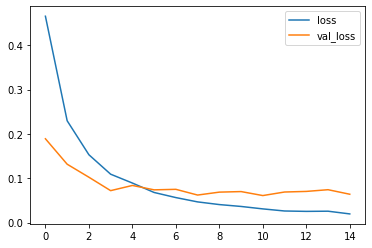

In [20]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

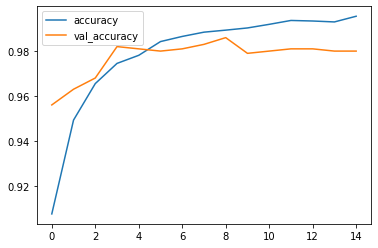

In [21]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [8]:
# there are many many other built-in layers
# dropout , batchnorm , convolution ....

<h1>code</h1>

In [1]:
# next is PyTorch

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.autograd import Variable
from torch import optim
from torch.nn import Linear,ReLU,CrossEntropyLoss,Dropout,BatchNorm1d

In [3]:
# first lets get the data , we will use MNIST dataset
def get_mnist(limit=None,normalise = False , D=300): 
    df = pd.read_csv('datasets/MNIST/train.csv')
    data = df.to_numpy()
    np.random.shuffle(data)
    X = data[:,1:]
    Y = data[:,0]
    # data is too large , so training would take too much time
    # of course to little data is not good and leads to overfitting

    Xtrain = X[:-1000]
    Ytrain = Y[:-1000]
    Xtest  = X[-1000:]
    Ytest  = Y[-1000:]

    
    if normalise:
        mu = Xtrain.mean(axis=0)
        std = Xtrain.std(axis=0)
        np.place(std,std==0,1)
        Xtrain = (Xtrain-mu)/std
        Xtest = (Xtest-mu)/std
        return Xtrain,Xtest,Ytrain,Ytest
    
    return Xtrain,Xtest,Ytrain,Ytest

In [4]:
Xtrain,Xtest,Ytrain,Ytest = get_mnist(normalise=True)

In [5]:
_,D = Xtrain.shape
K = len(set(Ytrain))

In [6]:
# model is sequence of layers
# very similar to keras

model = torch.nn.Sequential()

model.add_module("dense1",Linear(D,500))
model.add_module("relu1",ReLU())
model.add_module("dense2",Linear(500,300))
model.add_module("relu2",ReLU())
model.add_module("dense3",Linear(300,K))

In [7]:
# reduction='mean : divide sum by number of elements to get average loss
# loss invariant to batch size
loss = CrossEntropyLoss(reduction='mean') 
optimiser = optim.Adam(model.parameters())

In [8]:
# now for gradient descent
# more work when compared to keras or tensorflow
# so lets take it step by step

# this function performs only one step of gradient descnet

def train(model,loss,optimiser,inputs,labels):
    # turn inputs and labels into torch variables objects
    # requires_grad = False since we dont want to differentiate wrt these variables
    # code still works if we skip this step , but helps things be more effecient
    inputs = Variable(inputs,requires_grad=False)
    labels = Variable(labels,requires_grad=False)
    
    # pytorch automatically accumulates gradients
    # the gradient for a weight matrix is set to its current gradient + previous value
    # helpful for some applications like RNNs
    # but for most of the time we want to zero the gradient out
    optimiser.zero_grad()
    
    # forward
    logits = model.forward(inputs)
    output = loss.forward(logits,labels)
    
    # backpropagation
    output.backward()
    
    # update parameters
    optimiser.step()
     
    # return actual number that represents the loss , and acc
    return output.item(),np.mean(logits.data.numpy().argmax(axis=1) == labels.numpy())

In [9]:
# this actually return logits nore predictions
# for predictuins return logits.data.numpy().argmax(axis=1)
# we need logits to calculate loss
def predict(model,inputs): 
    inputs = Variable(inputs,requires_grad=False)
    logits = model.forward(inputs)
    return logits

In [22]:
# convert data into torch tensors
Xtrain = torch.from_numpy(Xtrain).float()
Ytrain = torch.from_numpy(Ytrain).long()
Xtest = torch.from_numpy(Xtest).float()
Ytest = torch.from_numpy(Ytest).long()

In [11]:
epochs = 15
batch_size = 32
n_batches = Xtrain.size()[0] // batch_size

train_costs = []
test_costs = []

train_accuracies = []
test_accuracies = []

for i in range(epochs):
    cost = 0.
    acc = 0.
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_size:(j+1)*batch_size]
        Ybatch = Ytrain[j*batch_size:(j+1)*batch_size]
        # get cost and accuracy of each batch
        c,a = train(model,loss,optimiser,Xbatch,Ybatch)
        cost += c
        acc += a
    # get average cost & acc
    train_cost = (cost/n_batches)
    train_acc = (acc/n_batches)
    
    # now lets get test metrics
    test_logits = predict(model,Xtest)
    Ypred = test_logits.data.numpy().argmax(axis=1)
    test_cost = loss.forward(test_logits,Variable(Ytest,requires_grad=False)).item()
    test_acc = np.mean(Ytest.numpy() == Ypred)
    
    print("Epoch: ",str(i+1) , ' train cost: ',train_cost , ' train acc: ', train_acc, ' test cost: ',test_cost , ' test acc: ', test_acc)
    
    train_costs.append(train_cost)
    train_accuracies.append(train_acc)
    
    test_costs.append(test_cost)
    test_accuracies.append(test_acc)
    

Epoch:  1  train cost:  0.24378571639260588  train acc:  0.9295228337236534  test cost:  0.17088791728019714  test acc:  0.957
Epoch:  2  train cost:  0.1124391407997745  train acc:  0.9668471896955504  test cost:  0.13005317747592926  test acc:  0.969
Epoch:  3  train cost:  0.0760962756396337  train acc:  0.9762392661982826  test cost:  0.10730502009391785  test acc:  0.97
Epoch:  4  train cost:  0.06129987421966396  train acc:  0.9808255269320844  test cost:  0.12534889578819275  test acc:  0.965
Epoch:  5  train cost:  0.05565101270441274  train acc:  0.9837529274004684  test cost:  0.1756577044725418  test acc:  0.974
Epoch:  6  train cost:  0.04150642508980365  train acc:  0.9877537080405933  test cost:  0.1574295312166214  test acc:  0.971
Epoch:  7  train cost:  0.04260608674239365  train acc:  0.9879976580796253  test cost:  0.1622752547264099  test acc:  0.971
Epoch:  8  train cost:  0.04341315689797288  train acc:  0.9884367681498829  test cost:  0.1408192217350006  test acc

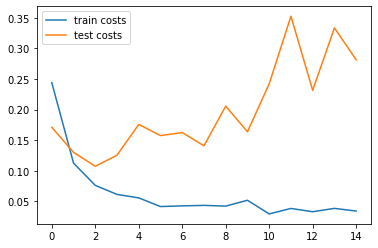

In [12]:
# plot costs
plt.plot(train_costs,label='train costs')
plt.plot(test_costs,label='test costs')
plt.legend()
plt.show()

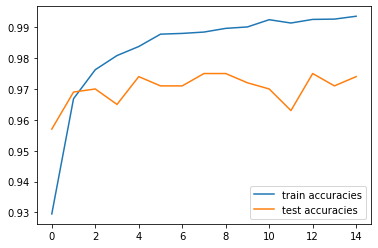

In [13]:
# plot accuracies
plt.plot(train_accuracies,label='train accuracies')
plt.plot(test_accuracies,label='test accuracies')
plt.legend()
plt.show()

In [29]:
# next lets try dropout

In [30]:
# first lets add dropout layers
model2 = torch.nn.Sequential()

model2.add_module("dropout1",Dropout(p=0.2)) # this is pdrop not pkeep
model2.add_module("dense1",Linear(D,500))
model2.add_module("relu1",ReLU())
model2.add_module("dropout2",Dropout(p=0.5))
model2.add_module("dense2",Linear(500,300))
model2.add_module("relu2",ReLU())
model2.add_module("dropout3",Dropout(p=0.5))
model2.add_module("dense3",Linear(300,K))

loss = CrossEntropyLoss(reduction='mean') 
optimiser = optim.Adam(model2.parameters())

In [31]:
# next is training function we need a little change
def train(model,loss,optimiser,inputs,labels):
    # dropout has 2 modes train and test , so we need to set model to train mode
    model.train()
    # same as before
    inputs = Variable(inputs,requires_grad=False)
    labels = Variable(labels,requires_grad=False)
    optimiser.zero_grad()
    logits = model.forward(inputs)
    output = loss.forward(logits,labels)
    output.backward()
    optimiser.step()    
    return output.item(),np.mean(logits.data.numpy().argmax(axis=1) == labels.numpy())

In [32]:
# again we need to set test mode for predict function
def predict(model,inputs):
    model.eval()
    inputs = Variable(inputs,requires_grad=False)
    logits = model.forward(inputs)
    return logits

In [33]:
epochs = 15
batch_size = 32
n_batches = Xtrain.size()[0] // batch_size

train_costs = []
test_costs = []

train_accuracies = []
test_accuracies = []

for i in range(epochs):
    cost = 0.
    acc = 0.
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_size:(j+1)*batch_size]
        Ybatch = Ytrain[j*batch_size:(j+1)*batch_size]
        # get cost and accuracy of each batch
        c,a = train(model2,loss,optimiser,Xbatch,Ybatch)
        cost += c
        acc += a
    # get average cost & acc
    train_cost = (cost/n_batches)
    train_acc = (acc/n_batches)
    
    # now lets get test metrics
    test_logits = predict(model2,Xtest)
    Ypred = test_logits.data.numpy().argmax(axis=1)
    test_cost = loss.forward(test_logits,Variable(Ytest,requires_grad=False)).item()
    test_acc = np.mean(Ytest.numpy() == Ypred)
    
    print("Epoch: ",str(i+1) , ' train cost: ',train_cost , ' train acc: ', train_acc, ' test cost: ',test_cost , ' test acc: ', test_acc)
    
    train_costs.append(train_cost)
    train_accuracies.append(train_acc)
    
    test_costs.append(test_cost)
    test_accuracies.append(test_acc)
    

Epoch:  1  train cost:  0.4017067249052977  train acc:  0.8812695160031225  test cost:  0.20289385318756104  test acc:  0.94
Epoch:  2  train cost:  0.2732284355873735  train acc:  0.9189110070257611  test cost:  0.14242854714393616  test acc:  0.957
Epoch:  3  train cost:  0.2415576436459454  train acc:  0.9294008587041374  test cost:  0.13472576439380646  test acc:  0.967
Epoch:  4  train cost:  0.22964212915948815  train acc:  0.9328405542544886  test cost:  0.11204999685287476  test acc:  0.967
Epoch:  5  train cost:  0.2251532385992737  train acc:  0.9358167447306791  test cost:  0.10779350996017456  test acc:  0.967
Epoch:  6  train cost:  0.21690197014537038  train acc:  0.9376951600312255  test cost:  0.10164733976125717  test acc:  0.972
Epoch:  7  train cost:  0.2058219199705357  train acc:  0.9421106557377049  test cost:  0.09596263617277145  test acc:  0.972
Epoch:  8  train cost:  0.21068515706468216  train acc:  0.9406469555035128  test cost:  0.11103922128677368  test ac

In [36]:
# next is batchnorm same as dropout has two modes , train and test
# so same code just with batch norm layers

In [38]:
# first lets add dropout layers
model3 = torch.nn.Sequential()

model3.add_module("dense1",Linear(D,500))
model3.add_module("batchnorm1",BatchNorm1d(500)) 
model3.add_module("relu1",ReLU())
model3.add_module("dense2",Linear(500,300))
model3.add_module("batchnorm2",BatchNorm1d(300)) 
model3.add_module("relu2",ReLU())
model3.add_module("dense3",Linear(300,K))

loss = CrossEntropyLoss(reduction='mean') 
optimiser = optim.Adam(model3.parameters())

In [39]:
epochs = 15
batch_size = 32
n_batches = Xtrain.size()[0] // batch_size

train_costs = []
test_costs = []

train_accuracies = []
test_accuracies = []

for i in range(epochs):
    cost = 0.
    acc = 0.
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_size:(j+1)*batch_size]
        Ybatch = Ytrain[j*batch_size:(j+1)*batch_size]
        # get cost and accuracy of each batch
        c,a = train(model3,loss,optimiser,Xbatch,Ybatch)
        cost += c
        acc += a
    # get average cost & acc
    train_cost = (cost/n_batches)
    train_acc = (acc/n_batches)
    
    # now lets get test metrics
    test_logits = predict(model3,Xtest)
    Ypred = test_logits.data.numpy().argmax(axis=1)
    test_cost = loss.forward(test_logits,Variable(Ytest,requires_grad=False)).item()
    test_acc = np.mean(Ytest.numpy() == Ypred)
    
    print("Epoch: ",str(i+1) , ' train cost: ',train_cost , ' train acc: ', train_acc, ' test cost: ',test_cost , ' test acc: ', test_acc)
    
    train_costs.append(train_cost)
    train_accuracies.append(train_acc)
    
    test_costs.append(test_cost)
    test_accuracies.append(test_acc)
    

Epoch:  1  train cost:  0.2499821621249957  train acc:  0.9241071428571429  test cost:  0.11853677034378052  test acc:  0.96
Epoch:  2  train cost:  0.10379634047843876  train acc:  0.968993950039032  test cost:  0.10955554991960526  test acc:  0.971
Epoch:  3  train cost:  0.05884095410064625  train acc:  0.9818745120999219  test cost:  0.10812043398618698  test acc:  0.967
Epoch:  4  train cost:  0.03990348188164204  train acc:  0.9877293130366901  test cost:  0.08718066662549973  test acc:  0.974
Epoch:  5  train cost:  0.028707165791402544  train acc:  0.9908274785323966  test cost:  0.08488322794437408  test acc:  0.981
Epoch:  6  train cost:  0.023767443012432443  train acc:  0.9919984387197502  test cost:  0.10159896314144135  test acc:  0.972
Epoch:  7  train cost:  0.01924800866950871  train acc:  0.9935841139734582  test cost:  0.0740746557712555  test acc:  0.978
Epoch:  8  train cost:  0.014308480958425492  train acc:  0.9955601092896175  test cost:  0.10718050599098206  te